<a href="https://colab.research.google.com/github/Laimo64/SAM-Liver/blob/main/nnUNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customized Segment Anything Model for Medical Image Segmentation
### [[Paper](https://arxiv.org/pdf/2304.13785.pdf)] [[Github](https://github.com/hitachinsk/SAMed)]
---


# Setup environment

In [1]:
!pip install -q gdown==4.6.0 einops==0.6.1 icecream==2.1.3 MedPy==0.4.0 monai==1.1.0 opencv_python==4.5.4.58 SimpleITK==2.2.1 tensorboardX==2.6 ml-collections==0.1.1 onnx==1.13.1 onnxruntime==1.14.1 tensorboardX torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 MB 7.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [2]:
pip install medpy icecream monai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   

# Download codes, pretrained weights and test data

In [3]:
# prepare codes
import os
CODE_DIR = 'samed_codes'
os.makedirs(f'./{CODE_DIR}')
!git clone https://github.com/hitachinsk/SAMed.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')

Cloning into 'samed_codes'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 225 (delta 86), reused 72 (delta 72), pack-reused 123 (from 1)
Receiving objects: 100% (225/225), 635.01 KiB | 20.48 MiB/s, done.
Resolving deltas: 100% (105/105), done.


In [4]:
# this is the small dataset based on L3D_Dataset, change to L3D_Dataset when the code is ready
# !gdown --fuzzy https://drive.google.com/file/d/18KVLU4y0BPoRqtHnhsE3KbTQb2BEUXTz/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1JyTYDCkv3RGUnkE--l-Kf9v5PLOCI3k1/view?usp=drive_link  #L3D_dataset
!ls

Downloading...
From (original): https://drive.google.com/uc?id=1JyTYDCkv3RGUnkE--l-Kf9v5PLOCI3k1
From (redirected): https://drive.google.com/uc?id=1JyTYDCkv3RGUnkE--l-Kf9v5PLOCI3k1&confirm=t&uuid=afa104b2-56d0-4b4a-a39e-a4439f5a87d8
To: /content/samed_codes/L3D_Dataset.zip
100% 3.64G/3.64G [01:25<00:00, 42.7MB/s]
datasets	 preprocess				 sam_lora_image_encoder.py  train.py
L3D_Dataset.zip  README.md				 segment_anything	    utils.py
LICENSE		 requirements.txt			 subsample_datasets.py
lists		 SAMed_h				 test.py
materials	 sam_lora_image_encoder_mask_decoder.py  trainer.py


In [5]:
%cd /content/samed_codes
#dataset
import zipfile
with zipfile.ZipFile('L3D_Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()
#weights
!gdown https://drive.google.com/uc?id=1P0Bm-05l-rfeghbrT1B62v5eN-3A-uOr #'epoch_159.pth'
!gdown https://drive.google.com/uc?id=1_oCdoEEu3mNhRfFxeWyRerOKt8OEUvcg #'sam_vit_b_01ec64.pth'

/content
Downloading...
From: https://drive.google.com/uc?id=1P0Bm-05l-rfeghbrT1B62v5eN-3A-uOr
To: /content/samed_codes/epoch_159.pth
100% 19.7M/19.7M [00:00<00:00, 147MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1_oCdoEEu3mNhRfFxeWyRerOKt8OEUvcg
From (redirected): https://drive.google.com/uc?id=1_oCdoEEu3mNhRfFxeWyRerOKt8OEUvcg&confirm=t&uuid=2959563f-158c-4ec4-94aa-3bf2470ee068
To: /content/samed_codes/sam_vit_b_01ec64.pth
100% 375M/375M [00:08<00:00, 45.0MB/s]


Dataloader:

/content


[0 1 2 3]


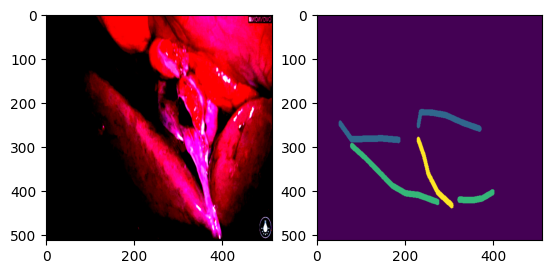

In [6]:
%cd /content/samed_codes
import os
import cv2
import json
import random
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
from torchvision.transforms import InterpolationMode
from scipy import ndimage
from scipy.ndimage import zoom
from glob import glob
from einops import repeat

def normalise_intensity(image, ROI_thres=0.1):
    pixel_thres = np.percentile(image, ROI_thres)
    ROI = np.where(image > pixel_thres, image, 0) # If image value is greater than pixel threshold, return image value, otherwise return 0
    mean = np.mean(ROI)
    std = np.std(ROI)
    ROI_norm = (ROI - mean) / (std + 1e-8) # Normalise ROI
    return ROI_norm

def random_rot_flip(image, label):
    k = np.random.randint(0, 4)
    image = np.rot90(image, k)
    label = np.rot90(label, k)
    axis = np.random.randint(0, 2)
    image = np.flip(image, axis=axis).copy()
    label = np.flip(label, axis=axis).copy()
    return image, label

def random_rotate(image, label):
    angle = np.random.randint(-20, 20)
    image = ndimage.rotate(image, angle, order=0, reshape=False)
    label = ndimage.rotate(label, angle, order=0, reshape=False)
    return image, label

class SegmentationDataset(Dataset):
    def __init__(self, root='/content/samed_codes/L3D_Dataset/Train', low_res=None, transform_img=None, transform_mask=None, istrain=False):
        self.img_path_all = glob(root + '/images/*.jpg')  # Update the path and pattern
        self.mask_path_all = glob(root + '/masks_gt/*.png')  # Update the path and pattern
        self.transform_img = transform_img
        self.transform_mask = transform_mask
        self.istrain = istrain
        self.low_res = low_res

        self.brightness = 0.1
        self.contrast = 0.1
        self.saturation = 0.1
        self.hue = 0.1
        self.color_aug = transforms.ColorJitter(self.brightness, self.contrast, self.saturation, self.hue)

    def __len__(self):
        return len(self.img_path_all)

    def __getitem__(self, idx):
        img_path = self.img_path_all[idx]
        mask_path = self.mask_path_all[idx]
        # print(f"Found {len(self.img_path_all)} images and {len(self.mask_path_all)} masks")

        # Open image and mask
        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L') #29(3), 76(1), 150 (2)
        mask = np.array(mask)
        # class mapping
        mask[mask==0] = 0   #background
        mask[mask==76] = 1  #red
        mask[mask==150] = 2 #green
        mask[mask==29] = 3 #blue
        mask = Image.fromarray(mask)
        # Apply transformations if provided
        if self.istrain:
            hflip = random.random() < 0.5
            flip_container = random.choice([Image.FLIP_LEFT_RIGHT, Image.FLIP_TOP_BOTTOM])
            if hflip:
                image = self.color_aug(image)
                image = image.transpose(flip_container)
                mask = mask.transpose(flip_container)
        if self.transform_img:
            image = self.transform_img(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)  # Convert first channel of mask to Image format
        # image = transforms.ToTensor()(image)  # **Converting image to tensor**
        mask = torch.from_numpy(np.array(mask)).long()
        sample = {'image': image, 'mask': mask}

        if self.low_res:
            low_res_label = zoom(mask, (self.low_res/mask.shape[0], self.low_res/mask.shape[1]), order=0)
            sample = {'image': image, 'mask': mask, 'low_res_label': low_res_label}

        return sample

transform_img = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        )
    ])

transform_mask = transforms.Compose([
    transforms.Resize((512, 512), interpolation=InterpolationMode.NEAREST),
    # transforms.ToTensor(),
    ])
ds = SegmentationDataset(transform_img=transform_img, transform_mask=transform_mask, istrain=True)
for sample in ds:
    print(np.unique(sample['mask']))  # Check unique values in the mask (class IDs)
    plt.subplot(121); plt.imshow(sample['image'].permute(1, 2, 0))  # Rearrange image channels for display
    plt.subplot(122); plt.imshow(sample['mask'])  # Display the mask
    break



Visualize & Checkpoint

In [7]:
def plot_inference(model, testloader, ce_loss, dice_loss, multimask_output=True, args=None):
    model.eval()  # Disable dropout and batch normalization
    num_samples_to_plot = 3  # Number of images to visualize

    fig, axs = plt.subplots(num_samples_to_plot, 3, figsize=(12, num_samples_to_plot * 4),
                            subplot_kw=dict(xticks=[], yticks=[]))
    fig.suptitle("Input Image | Predicted Mask | Ground Truth", fontsize=16)

    with torch.no_grad():  # Disable gradient calculation
        for i_batch, sampled_batch in enumerate(testloader):
            if i_batch >= num_samples_to_plot:
                break

            try:
                image_batch, label_batch, low_res_label_batch = (
                    sampled_batch['image'],
                    sampled_batch['mask'],
                    sampled_batch['low_res_label']
                )
                image_batch = image_batch.to(device, dtype=torch.float32)
                label_batch = label_batch.to(device, dtype=torch.long)
            except Exception as e:
                print(f"Error loading data for batch {i_batch + 1}: {e}")
                continue

            # Call the model with only the image_batch
            outputs = model(image_batch)  # Removed multimask_output and args.img_size
            logits = outputs  # Assuming model directly outputs logits
            pred_seg = torch.argmax(logits, dim=1)

            input_image = image_batch[0].cpu().numpy().transpose(1, 2, 0)
            pred_mask = pred_seg[0].cpu().numpy()
            true_mask = label_batch[0].cpu().numpy()

            input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())

            axs[i_batch, 0].imshow(input_image)
            axs[i_batch, 0].set_title("Input Image")

            axs[i_batch, 1].imshow(pred_mask, cmap="jet", interpolation="none")
            axs[i_batch, 1].set_title("Predicted Mask")

            axs[i_batch, 2].imshow(true_mask, cmap="jet", interpolation="none")
            axs[i_batch, 2].set_title("Ground Truth Mask")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


def save_checkpoint(net, optimizer, epoch, best_loss, best_epoch, best_result, checkpoint_path):
    checkpoint = {
        'epoch': epoch,
        'best_loss': best_loss,
        'best_epoch': best_epoch,
        # 'epoch_since_improvement': epoch_since_improvement,
        'best_result': best_result,
        'model_state_dict': net.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved at '{checkpoint_path}' (Epoch {epoch}, Best Loss {best_loss}, Best Epoch {best_epoch})")


def load_checkpoint(model, optimizer, filename, device='cpu'):
    if os.path.isfile(filename):  # 檢查檔案是否存在
        print(f"=> Loading checkpoint from '{filename}'")
        checkpoint = torch.load(filename, map_location=device)

        # 載入模型和優化器的狀態
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        # 獲取其他保存的狀態
        start_epoch = checkpoint.get('epoch', 0) + 1
        best_loss = checkpoint.get('best_loss', float('inf'))
        best_epoch = checkpoint.get('best_epoch', 0)
        best_result = checkpoint.get('best_result', None)

        print(f"=> Loaded checkpoint (Epoch {checkpoint.get('epoch', 'N/A')})")
        return start_epoch, best_loss, best_epoch, best_result
    else:
        print(f"=> No checkpoint found at '{filename}'")
        # 返回初始狀態，確保不會中斷訓練流程
        return 1, float('inf'), 0, None


nnUNet Training

/content
Training on: cuda train sample size: 921 test sample size: 109 batch: 8
=> No checkpoint found at 'checkpoint.pth'
Resuming training from epoch 1 with best loss inf, best epoch 0.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 1, Best Loss inf, Best Epoch 0)
--- Epoch 1\21: Training loss = 0.8347, Testing: [loss = 0.6718, dice = 0.2469], Best loss = 0.6718, Best epoch = 1, lr = 0.002320
Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 2, Best Loss 0.671771228313446, Best Epoch 1)
--- Epoch 2\21: Training loss = 0.6695, Testing: [loss = 0.6623, dice = 0.2511], Best loss = 0.6623, Best epoch = 2, lr = 0.002320
Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 3, Best Loss 0.6623205840587616, Best Epoch 2)
--- Epoch 3\21: Training loss = 0.6626, Testing: [loss = 0.6578, dice = 0.2545], Best loss = 0.6578, Best epoch = 3, lr = 0.002320
Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 4, Best Loss 0.6577728901590619, Best Epoch 3)
--- Epoch 4\21: Training loss = 0.6601, Testing: [loss = 0.6567, dice = 0.2528], Best loss = 0.6567, Best epoch = 4, lr = 0.002320
Checkpoint saved at '/content/samed_codes/ch

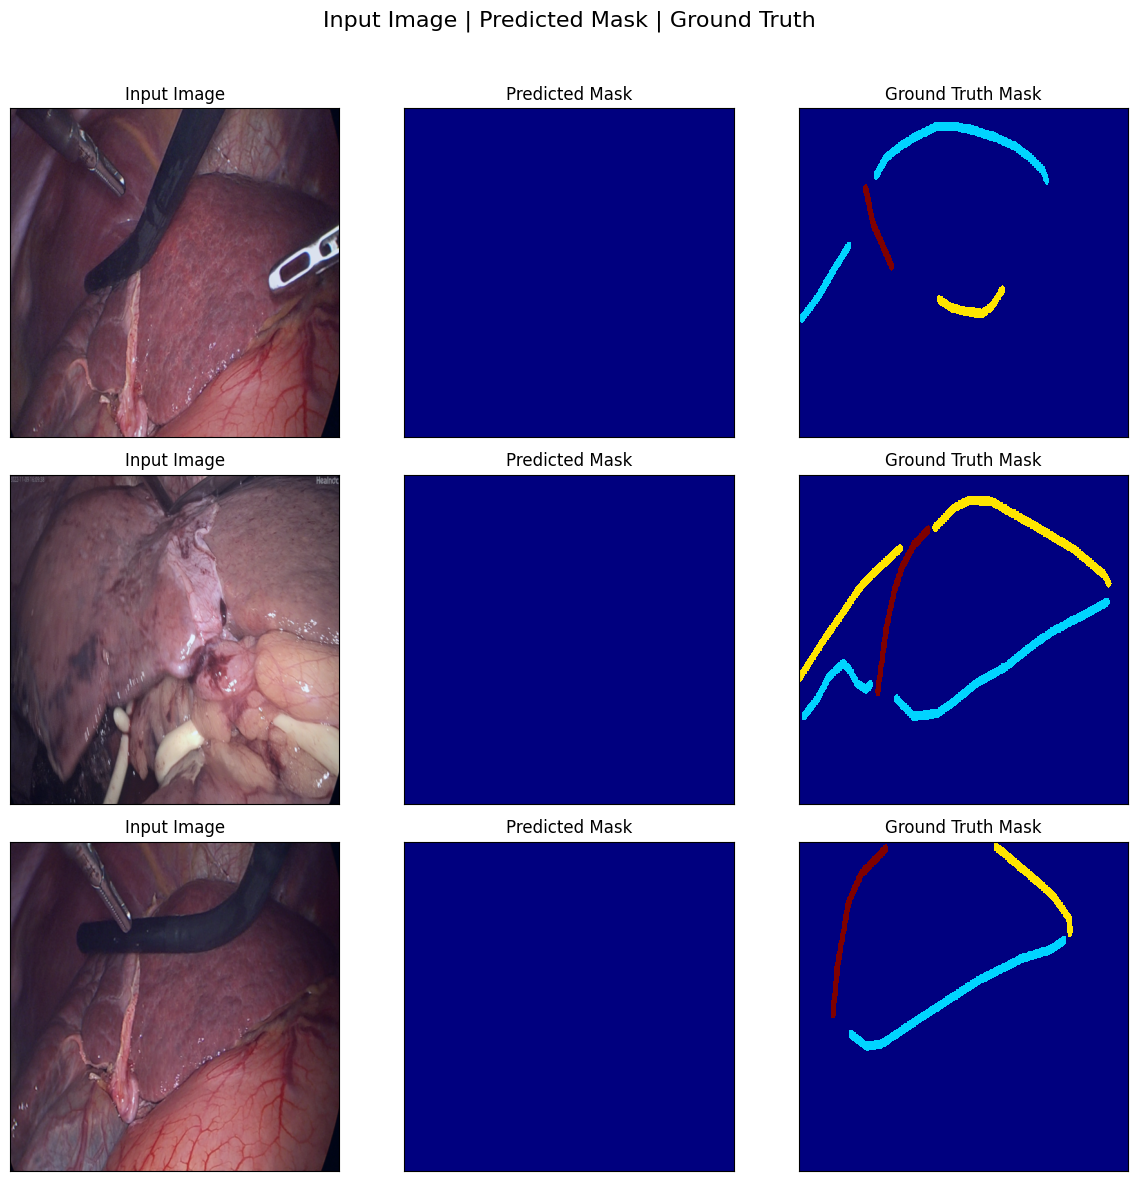

Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 6, Best Loss 0.6550920307636261, Best Epoch 5)
--- Epoch 6\21: Training loss = 0.6574, Testing: [loss = 0.6553, dice = 0.2618], Best loss = 0.6551, Best epoch = 5, lr = 0.002320
Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 7, Best Loss 0.6550920307636261, Best Epoch 5)
--- Epoch 7\21: Training loss = 0.6566, Testing: [loss = 0.6522, dice = 0.2596], Best loss = 0.6522, Best epoch = 7, lr = 0.002320
Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 8, Best Loss 0.6522451298577445, Best Epoch 7)
--- Epoch 8\21: Training loss = 0.6557, Testing: [loss = 0.6530, dice = 0.2556], Best loss = 0.6522, Best epoch = 7, lr = 0.002320
Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 9, Best Loss 0.6522451298577445, Best Epoch 7)
--- Epoch 9\21: Training loss = 0.6544, Testing: [loss = 0.6520, dice = 0.2577], Best loss = 0.6520, Best epoch = 9, lr = 0.002320
Checkpoint saved at '/conten

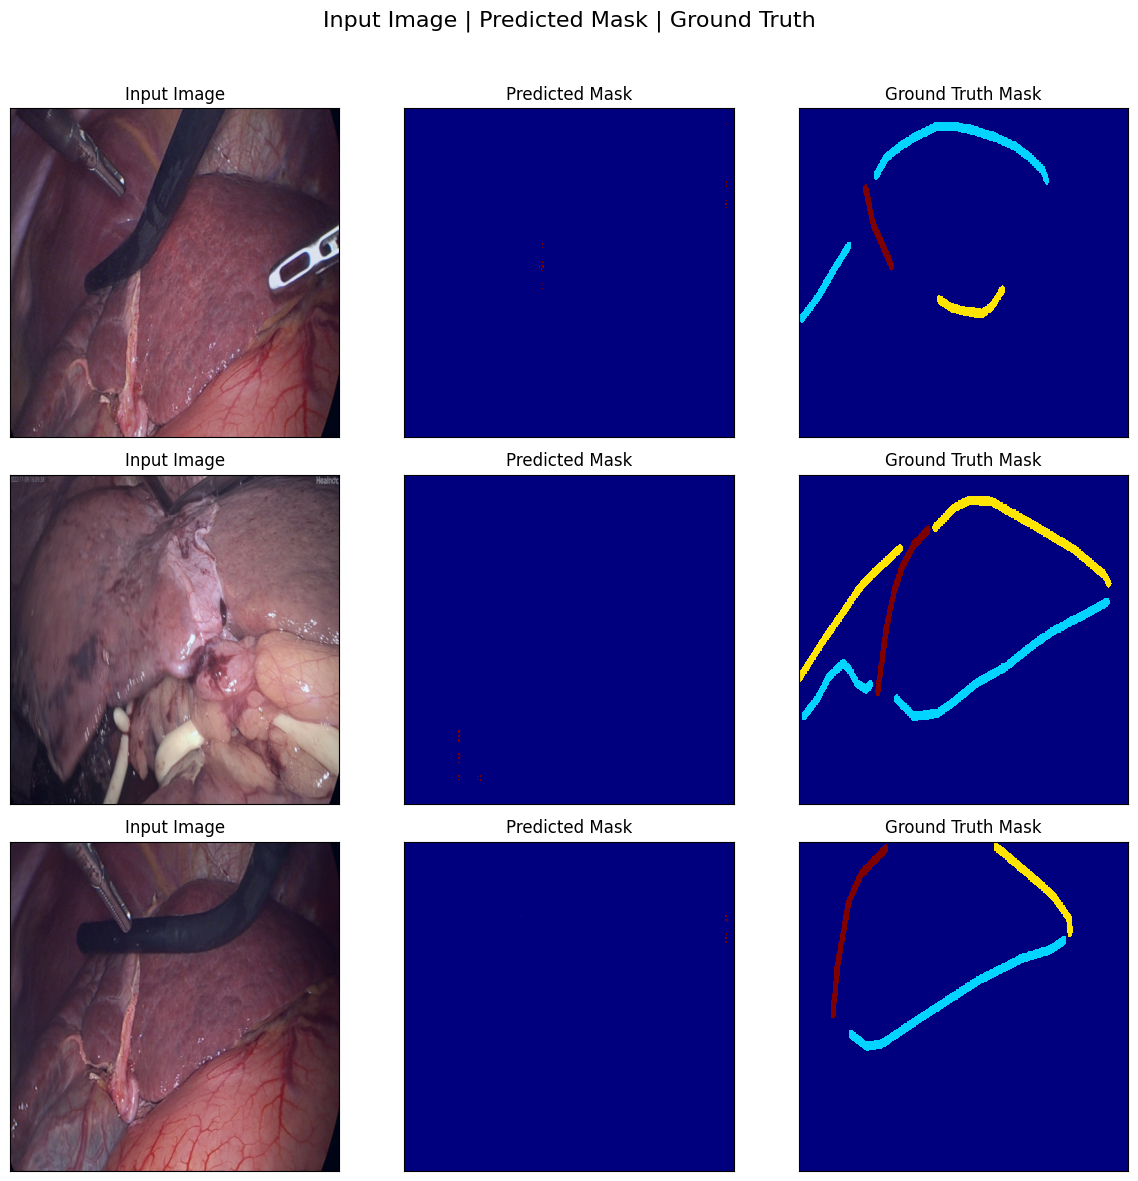

Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 11, Best Loss 0.6519699990749359, Best Epoch 9)
--- Epoch 11\21: Training loss = 0.6534, Testing: [loss = 0.6528, dice = 0.2607], Best loss = 0.6520, Best epoch = 9, lr = 0.002320
Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 12, Best Loss 0.6519699990749359, Best Epoch 9)
--- Epoch 12\21: Training loss = 0.6541, Testing: [loss = 0.6478, dice = 0.2626], Best loss = 0.6478, Best epoch = 12, lr = 0.002320
Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 13, Best Loss 0.6478230314595359, Best Epoch 12)
--- Epoch 13\21: Training loss = 0.6522, Testing: [loss = 0.6455, dice = 0.2645], Best loss = 0.6455, Best epoch = 13, lr = 0.002320
Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 14, Best Loss 0.64546337723732, Best Epoch 13)
--- Epoch 14\21: Training loss = 0.6515, Testing: [loss = 0.6474, dice = 0.2653], Best loss = 0.6455, Best epoch = 13, lr = 0.002320
Checkpoint saved 

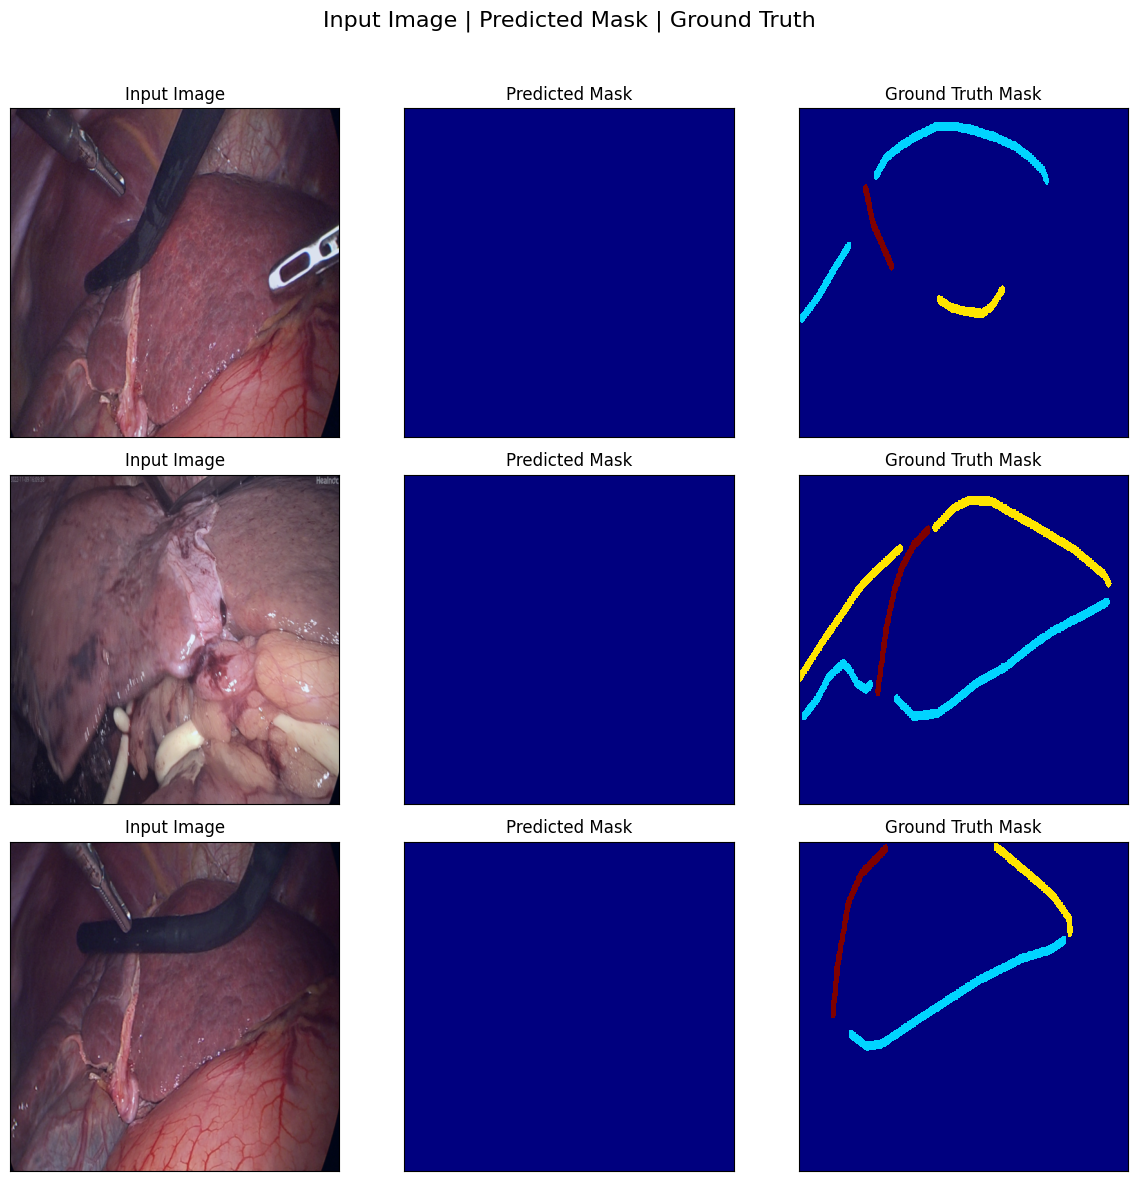

Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 16, Best Loss 0.64546337723732, Best Epoch 13)
--- Epoch 16\21: Training loss = 0.6509, Testing: [loss = 0.6471, dice = 0.2690], Best loss = 0.6455, Best epoch = 13, lr = 0.002320
Checkpoint saved at '/content/samed_codes/checkpoint.pth' (Epoch 17, Best Loss 0.64546337723732, Best Epoch 13)
--- Epoch 17\21: Training loss = 0.6501, Testing: [loss = 0.6459, dice = 0.2675], Best loss = 0.6455, Best epoch = 13, lr = 0.002320


In [ ]:
%cd /content/samed_codes
import os
import sys
from tqdm import tqdm
import logging
import numpy as np
import argparse
import random
import numpy as np
import torch
from torch.utils.data import DataLoader
import torch.backends.cudnn as cudnn
from importlib import import_module
from segment_anything import sam_model_registry
from datasets.dataset_synapse import Synapse_dataset
from icecream import ic
from medpy import metric
from scipy.ndimage import zoom
import torch.nn as nn
import SimpleITK as sitk
import torch.nn.functional as F
import imageio
from einops import repeat

from torch.nn.modules.loss import CrossEntropyLoss
from utils import DiceLoss
import torch.optim as optim
import monai


def seed_everything(seed=42):
    cudnn.benchmark = False
    cudnn.deterministic = True
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def calc_loss(outputs, label_batch, ce_loss, dice_loss, dice_weight:float=0.8):
    loss_ce = ce_loss(outputs, label_batch[:].long())
    loss_dice = dice_loss(outputs, label_batch, softmax=True)
    loss = (1 - dice_weight) * loss_ce + dice_weight * loss_dice
    return loss, loss_ce, loss_dice

def training_per_epoch(model, trainloader, optimizer, iter_num, ce_loss, dice_loss, multimask_output=True, args=None):
    model.train()
    loss_all = []
    for i_batch, sampled_batch in enumerate(trainloader):
        image_batch, label_batch, low_res_label_batch = sampled_batch['image'],sampled_batch['mask'], sampled_batch['low_res_label']
        image_batch, label_batch, low_res_label_batch = image_batch.to(device, dtype=torch.float32), label_batch.to(device, dtype=torch.long), low_res_label_batch.to(device, dtype=torch.long)
        outputs = model(image_batch)
        # print('out:',outputs.shape)
        loss, loss_ce, loss_dice = calc_loss(outputs, label_batch, ce_loss, dice_loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_all.append(loss.item())
        if args.warmup and iter_num < args.warmup_period:
            lr_ = args.base_lr * ((iter_num + 1) / args.warmup_period)
            for param_group in optimizer.param_groups:
                param_group['lr'] = lr_
        else:
            if args.warmup:
                shift_iter = iter_num - args.warmup_period
                assert shift_iter >= 0, f'Shift iter is {shift_iter}, smaller than zero'
            else:
                shift_iter = iter_num
            lr_ = args.base_lr * (1.0 - shift_iter / args.max_iterations) ** 0.9  # learning rate adjustment depends on the max iterations
            for param_group in optimizer.param_groups:
                param_group['lr'] = lr_

        iter_num = iter_num + 1

    return np.mean(loss_all)


def test_per_epoch(model, testloader, ce_loss, dice_loss, multimask_output=True, args=None):
    model.eval()
    loss_per_epoch, dice_per_epoch = [], []
    with torch.no_grad():
        for i_batch, sampled_batch in enumerate(testloader):
            image_batch, label_batch, low_res_label_batch = sampled_batch['image'],sampled_batch['mask'], sampled_batch['low_res_label']
            image_batch, label_batch, low_res_label_batch = image_batch.to(device, dtype=torch.float32), label_batch.to(device, dtype=torch.long), low_res_label_batch.to(device, dtype=torch.long)
            outputs = model(image_batch)
            loss, loss_ce, loss_dice = calc_loss(outputs, label_batch, ce_loss, dice_loss)
            loss_per_epoch.append(loss.item())
            dice_per_epoch.append(1-loss_dice.item())
    return np.mean(loss_per_epoch), np.mean(dice_per_epoch)



def main():
    parser = argparse.ArgumentParser()
    parser.add_argument('--config', type=str, default=None, help='The config file provided by the trained model')
    #####################################
    parser.add_argument('--volume_path', type=str, default='/content/samed_codes/L3D_Dataset')
    parser.add_argument('--data_path', type=str, default='L3D_Dataset')
    #####################################
    parser.add_argument('--dataset', type=str, default='Synapse', help='Experiment name')
    parser.add_argument('--num_classes', type=int, default=4)
    parser.add_argument('--list_dir', type=str, default='./lists/lists_Synapse/', help='list_dir')
    parser.add_argument('--output_dir', type=str, default='results')
    parser.add_argument('--img_size', type=int, default=512, help='Input image size of the network')
    parser.add_argument('--input_size', type=int, default=224, help='The input size for training SAM model')
    parser.add_argument('--seed', type=int,
                        default=1234, help='random seed')
    parser.add_argument('--is_savenii', action='store_true', help='Whether to save results during inference')
    parser.add_argument('--deterministic', type=int, default=1, help='whether use deterministic training')
    parser.add_argument('--ckpt', type=str, default='checkpoints/sam_vit_b_01ec64.pth',
                        help='Pretrained checkpoint')
    parser.add_argument('--lora_ckpt', type=str, default='checkpoints/epoch_159.pth', help='The checkpoint from LoRA')
    parser.add_argument('--vit_name', type=str, default='vit_b', help='Select one vit model')
    parser.add_argument('--rank', type=int, default=6, help='Rank for LoRA adaptation')
    parser.add_argument('--module', type=str, default='sam_lora_image_encoder')

    parser.add_argument('--base_lr', type=float, default=0.005, help='segmentation network learning rate')
    parser.add_argument('--batch_size', type=int, default=8, help='batch_size per gpu')
    parser.add_argument('--warmup', type=bool, default=True, help='If activated, warp up the learning from a lower lr to the base_lr')
    parser.add_argument('--warmup_period', type=int, default=250, help='Warp up iterations, only valid whrn warmup is activated')
    parser.add_argument('--AdamW', type=bool, default=True, help='If activated, use AdamW to finetune SAM model')
    parser.add_argument('--max_epochs', type=int, default=21, help='maximum epoch number to train')
    parser.add_argument('--max_iterations', type=int, default=30000, help='maximum epoch number to train')


    if 'ipykernel' in sys.modules:
        args = parser.parse_args([])
    else:
        args = parser.parse_args()

    args.output_dir = 'results'
    os.makedirs(args.output_dir, exist_ok = True)


    kernels = [[3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3]]
    strides = [[1, 1], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]

    net = monai.networks.nets.DynUNet(
            spatial_dims=2,
            in_channels=3,
            out_channels=args.num_classes + 1,
            strides=strides,
            kernel_size=kernels,
            upsample_kernel_size=strides[1:],

    ).to(device)
    multimask_output = True if args.num_classes > 1 else False

    train_dataset = SegmentationDataset(root=(args.data_path+'/Train'), low_res=128, transform_img=transform_img, transform_mask=transform_mask, istrain=True)
    test_dataset = SegmentationDataset(root=(args.data_path+'/Test'), low_res=128, transform_img=transform_img, transform_mask=transform_mask)
    trainloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True, num_workers=4)
    testloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False, num_workers=4)
    print('Training on:', device, 'train sample size:', len(train_dataset), 'test sample size:', len(test_dataset), 'batch:', args.batch_size)

    ce_loss = CrossEntropyLoss()
    dice_loss = DiceLoss(args.num_classes + 1)
    b_lr = args.base_lr / args.warmup_period
    optimizer = optim.AdamW(filter(lambda p: p.requires_grad, net.parameters()), lr=b_lr, betas=(0.9, 0.999), weight_decay=0.1)
    iter_num = 0

    best_epoch, best_loss = 0.0, np.inf

    ######### load chechpoint
    checkpoint_path = '/content/samed_codes/checkpoint.pth'
    start_epoch, best_loss, best_epoch, best_result = load_checkpoint(net, optimizer, 'checkpoint.pth')
    # start_epoch, best_loss, best_epoch, epoch_since_improvement, best_result = load_checkpoint(net, optimizer, 'checkpoint.pth')

    if start_epoch == 1 and isinstance(best_loss, list) and best_loss == [0, 0]:
        print("No checkpoint loaded; starting training from scratch.")
        best_loss = np.inf
    else:
        print(f"Resuming training from epoch {start_epoch} with best loss {best_loss}, best epoch {best_epoch}.")
    ########

    for epoch in range(start_epoch, args.max_epochs):
        loss_training = training_per_epoch(net, trainloader, optimizer, iter_num, ce_loss, dice_loss, multimask_output=multimask_output, args=args)
        loss_testing, dice = test_per_epoch(net, testloader, ce_loss, dice_loss,multimask_output=True, args=args)

        ##### save checkpoint
        save_checkpoint(net, optimizer, epoch, best_loss, best_epoch, best_result, checkpoint_path)
        #####

        if loss_testing < best_loss:
            best_loss = loss_testing
            best_epoch = epoch
            torch.save(net.state_dict(), os.path.join(args.output_dir, 'model_best.pt'))
            # net.save_lora_parameters(os.path.join(args.output_dir, 'model_best.pt'))

        print('--- Epoch {}\{}: Training loss = {:.4f}, Testing: [loss = {:.4f}, dice = {:.4f}], Best loss = {:.4f}, Best epoch = {}, lr = {:.6f}'.\
            format(epoch, args.max_epochs, loss_training, loss_testing, dice, best_loss, best_epoch, optimizer.param_groups[0]['lr']))
        # Visualize
        if epoch % 5 ==0:
          plot_inference(net, testloader, ce_loss, dice_loss, multimask_output=True, args=args)



if __name__ == '__main__':
    seed_everything()
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    checkpoint_path = 'checkpoints'
    main()



Inference: My Dice Metrics

<ipython-input-9-ab8ac798c4c3>:120: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(args.ckpt))


Class Wise Dice: {'dice_cls:1': 0.02124037292257803, 'dice_cls:2': 0.6872871214213385, 'dice_cls:3': 0.0016489988221436984, 'dice_cls:4': 0.0}
Overall Dice: 0.17754412329151506


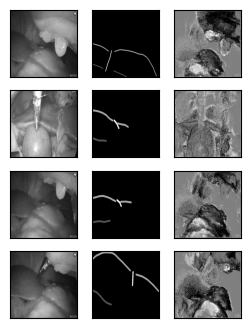

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_confusion_matrix_from_arrays(prediction, ground_truth, nr_labels):
    replace_indices = np.vstack((
        ground_truth.flatten(),
        prediction.flatten())
    ).T
    confusion_matrix, _ = np.histogramdd(
        replace_indices,
        bins=(nr_labels, nr_labels),
        range=[(0, nr_labels), (0, nr_labels)]
    )
    confusion_matrix = confusion_matrix.astype(np.uint32)
    return confusion_matrix

def calculate_dice(confusion_matrix):
    dices = []
    for index in range(confusion_matrix.shape[0]):
        true_positives = confusion_matrix[index, index]
        false_positives = confusion_matrix[:, index].sum() - true_positives
        false_negatives = confusion_matrix[index, :].sum() - true_positives
        denom = 2 * true_positives + false_positives + false_negatives
        if denom == 0:
            dice = 0
        else:
            dice = 2 * float(true_positives) / denom
        dices.append(dice)
    return dices

def test_per_epoch(model, testloader, ce_loss, dice_loss, multimask_output=True, args=None):
    model.eval()
    fig, axs = plt.subplots(len(testloader), 3, figsize=(1*3, len(testloader)*1), subplot_kw=dict(xticks=[],yticks=[]))
    loss_per_epoch, dice_per_epoch = [], []
    num_classes = args.num_classes + 1
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.uint32)
    class_wise_dice = []
    with torch.no_grad():
        for i_batch, sampled_batch in enumerate(testloader):
            image_batch, label_batch, low_res_label_batch = sampled_batch['image'],sampled_batch['mask'], sampled_batch['low_res_label']
            image_batch, label_batch, low_res_label_batch = image_batch.to(device, dtype=torch.float32), label_batch.to(device, dtype=torch.long), low_res_label_batch.to(device, dtype=torch.long)
            logits = model(image_batch)
            prob = F.softmax(logits, dim=1)
            pred_seg = torch.argmax(prob, dim=1)
            confusion_matrix += calculate_confusion_matrix_from_arrays(pred_seg.cpu(), label_batch.cpu(), num_classes)
            loss, loss_ce, loss_dice = calc_loss(logits, label_batch, ce_loss, dice_loss)
            loss_per_epoch.append(loss.item())
            dice_per_epoch.append(1-loss_dice.item())
            loss_dice = dice_loss(logits, label_batch, softmax=True)
            img_num = 0
            axs[i_batch, 0].imshow(image_batch[img_num, 0].cpu().numpy(), cmap='gray')
            axs[i_batch, 1].imshow(label_batch[img_num].cpu().numpy(), cmap='gray')
            axs[i_batch, 2].imshow(pred_seg[img_num].cpu().numpy(), cmap='gray')
            metric_list = []
            pred_seg, label_batch = pred_seg.cpu().detach().numpy(), label_batch.cpu().detach().numpy()

        confusion_matrix = confusion_matrix[1:, 1:]  # exclude background
        dices_per_class = {'dice_cls:{}'.format(cls + 1): dice
                    for cls, dice in enumerate(calculate_dice(confusion_matrix))}

    return np.mean(loss_per_epoch), np.mean(dice_per_epoch), dices_per_class



if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--config', type=str, default=None, help='The config file provided by the trained model')
    #####
    parser.add_argument('--volume_path', type=str, default='/content/samed_codes/test_dataset')
    parser.add_argument('--data_path', type=str, default='test_dataset')
    #####
    parser.add_argument('--dataset', type=str, default='Synapse', help='Experiment name')
    parser.add_argument('--num_classes', type=int, default=4)
    parser.add_argument('--list_dir', type=str, default='./lists/lists_Synapse/', help='list_dir')
    parser.add_argument('--output_dir', type=str, default='results')
    parser.add_argument('--img_size', type=int, default=512, help='Input image size of the network')
    parser.add_argument('--input_size', type=int, default=224, help='The input size for training SAM model')
    parser.add_argument('--seed', type=int,
                        default=1234, help='random seed')
    parser.add_argument('--is_savenii', action='store_true', help='Whether to save results during inference')
    parser.add_argument('--deterministic', type=int, default=1, help='whether use deterministic training')
    parser.add_argument('--ckpt', type=str, default='checkpoints/sam_vit_b_01ec64.pth',
                        help='Pretrained checkpoint')
    parser.add_argument('--lora_ckpt', type=str, default='checkpoints/epoch_159.pth', help='The checkpoint from LoRA')
    parser.add_argument('--vit_name', type=str, default='vit_b', help='Select one vit model')
    parser.add_argument('--rank', type=int, default=4, help='Rank for LoRA adaptation')
    parser.add_argument('--module', type=str, default='sam_lora_image_encoder')

    parser.add_argument('--base_lr', type=float, default=0.005, help='segmentation network learning rate')
    parser.add_argument('--batch_size', type=int, default=12, help='batch_size per gpu')
    parser.add_argument('--warmup', type=bool, default=True, help='If activated, warp up the learning from a lower lr to the base_lr')
    parser.add_argument('--warmup_period', type=int, default=250, help='Warp up iterations, only valid whrn warmup is activated')
    parser.add_argument('--AdamW', type=bool, default=True, help='If activated, use AdamW to finetune SAM model')
    parser.add_argument('--max_epochs', type=int, default=10, help='maximum epoch number to train')
    parser.add_argument('--max_iterations', type=int, default=30000, help='maximum epoch number to train')


    if 'ipykernel' in sys.modules:
        args = parser.parse_args([])
    else:
        args = parser.parse_args()

    args.ckpt = 'results/model_best.pt'
    kernels = [[3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3]]
    strides = [[1, 1], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]

    net = monai.networks.nets.DynUNet(
            spatial_dims=2,
            in_channels=3,
            out_channels=args.num_classes + 1,
            strides=strides,
            kernel_size=kernels,
            upsample_kernel_size=strides[1:],

    ).to(device)

    ce_loss = CrossEntropyLoss()
    dice_loss = DiceLoss(args.num_classes + 1)

    net.load_state_dict(torch.load(args.ckpt))
    test_dataset = SegmentationDataset(root=(args.data_path+'/Test'), low_res=128, transform_img=transform_img, transform_mask=transform_mask)
    testloader = DataLoader(test_dataset, batch_size=3, shuffle=False, num_workers=4)
    test_loss, overall_dice, dices_per_class = test_per_epoch(net, testloader, ce_loss, dice_loss, multimask_output=True, args=args)
    dices_per_class_list = np.array(list(dices_per_class.values()))
    print('Class Wise Dice:', dices_per_class)
    print('Overall Dice:', np.mean(dices_per_class_list))

Inference MRI to MRI<br>
download test mri

In [ ]:
# import gdown
# url = 'https://drive.google.com/uc?id=1zcvnBscFVI2v5ieAlGGnp0zpX8WmIrD4'
# gdown.download(url,'endonasal_mri_patients.zip',quiet=True)
# !unzip -q endonasal_mri_patients
# !rm -rf /content/endonasal_mri_patients/.DS_Store
# !rm -rf /content/endonasal_mri_patients/**/.DS_Store

MRI to MRI

In [ ]:
# import os
# import nibabel as nib
# import cv2
# import numpy as np
# from scipy.ndimage import zoom
# from einops import repeat
# import random
# import matplotlib.pyplot as plt
# import numpy as np

# def read_mri(mri_path):
#     img_meta = nib.load(mri_path)
#     array = img_meta.get_fdata()
#     return np.rot90(array)

# def normalise_intensity(image, ROI_thres=0.1):
#     pixel_thres = np.percentile(image, ROI_thres)
#     ROI = np.where(image > pixel_thres, image, 0) # If image value is greater than pixel threshold, return image value, otherwise return 0
#     mean = np.mean(ROI)
#     std = np.std(ROI)
#     ROI_norm = (ROI - mean) / (std + 1e-8) # Normalise ROI
#     return ROI_norm

# class EndonasalDataset_MRI(Dataset):
#     def __init__(self, root='endonasal_mri_patients', patient=None, low_res=None, isTrain=False):

#         mri_path = 'endonasal_mri_patients/mri0{}/mri0{}_t1c.nii.gz'.format(patient, patient)
#         self.mask_path = 'endonasal_mri_patients/mri0{}/mri0{}_mask.nii.gz'.format(patient, patient)
#         mri_array = read_mri(mri_path)
#         self.image_all = []
#         for z in range(mri_array.shape[2]):
#             normalized_slice = cv2.normalize(mri_array[:, :, z], None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
#             self.image_all.append(normalise_intensity(normalized_slice))

#         self.mask_all = read_mri(self.mask_path)
#         self.isTrain = isTrain
#         self.low_res = low_res

#     def __len__(self):
#       return len(self.image_all)

#     def __getitem__(self, index):
#         image = self.image_all[index]
#         image = zoom(image, (512/image.shape[0], 512/image.shape[1]), order=0)
#         label = self.mask_all[:,:,index]
#         label = zoom(label, (512/label.shape[0], 512/label.shape[1]), order=0)
#         if self.isTrain:
#             if random.random() > 0.5:
#                 image, label = random_rot_flip(image, label)
#             elif random.random() > 0.5:
#                 image, label = random_rotate(image, label)

#         image = repeat(np.expand_dims(image, axis=0), 'c h w -> (repeat c) h w', repeat=3)
#         sample = {'image': image, 'mask': label}
#         if self.low_res:
#             low_res_label = zoom(label, (self.low_res/label.shape[0], self.low_res/label.shape[1]), order=0)
#             sample = {'image': image, 'mask': label, 'low_res_label': low_res_label, 'maskpath': self.mask_path}

#         return sample


# def calculate_confusion_matrix_from_arrays(prediction, ground_truth, nr_labels):
#     replace_indices = np.vstack((
#         ground_truth.flatten(),
#         prediction.flatten())
#     ).T
#     confusion_matrix, _ = np.histogramdd(
#         replace_indices,
#         bins=(nr_labels, nr_labels),
#         range=[(0, nr_labels), (0, nr_labels)]
#     )
#     confusion_matrix = confusion_matrix.astype(np.uint32)
#     return confusion_matrix

# def calculate_dice(confusion_matrix):
#     dices = []
#     for index in range(confusion_matrix.shape[0]):
#         true_positives = confusion_matrix[index, index]
#         false_positives = confusion_matrix[:, index].sum() - true_positives
#         false_negatives = confusion_matrix[index, :].sum() - true_positives
#         denom = 2 * true_positives + false_positives + false_negatives
#         if denom == 0:
#             dice = 0
#         else:
#             dice = 2 * float(true_positives) / denom
#         dices.append(dice)
#     return dices

# def pred_to_mri(pred_seg_all, mask_path):
#     os.makedirs('predicted_mri', mode = 0o777, exist_ok = True)
#     img_meta = nib.load(mask_path)
#     pred_seg_all = np.rot90(np.array(pred_seg_all).transpose(1,2,0), k=-1)
#     img_nifti = nib.Nifti1Image(pred_seg_all, img_meta.affine, header=img_meta.header)
#     nib.save(img_nifti,'predicted_mri/'+os.path.basename(mask_path))

# def test_per_epoch(model, testloader, ce_loss, dice_loss, multimask_output=True, args=None):
#     model.eval()
#     loss_per_epoch, dice_per_epoch = [], []
#     num_classes = args.num_classes + 1
#     confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.uint32)
#     class_wise_dice = []
#     pred_seg_all = []
#     with torch.no_grad():
#         for i_batch, sampled_batch in enumerate(testloader):
#             image_batch, label_batch, low_res_label_batch = sampled_batch['image'],sampled_batch['mask'], sampled_batch['low_res_label']
#             image_batch, label_batch, low_res_label_batch = image_batch.to(device, dtype=torch.float32), label_batch.to(device, dtype=torch.long), low_res_label_batch.to(device, dtype=torch.long)
#             outputs = model(image_batch, multimask_output, args.img_size)
#             logits = outputs['masks']
#             prob = F.softmax(logits, dim=1)
#             pred_seg = torch.argmax(prob, dim=1)
#             pred_seg_all.extend(pred_seg.detach().cpu().numpy())
#             confusion_matrix += calculate_confusion_matrix_from_arrays(pred_seg.cpu(), label_batch.cpu(), num_classes)
#             loss, loss_ce, loss_dice = calc_loss(outputs, low_res_label_batch, ce_loss, dice_loss)
#             loss_per_epoch.append(loss.item())
#             dice_per_epoch.append(1-loss_dice.item())
#             low_res_logits = outputs['low_res_logits']
#             loss_dice = dice_loss(low_res_logits, low_res_label_batch, softmax=True)
#             metric_list = []
#             pred_seg, label_batch = pred_seg.cpu().detach().numpy(), label_batch.cpu().detach().numpy()

#         pred_to_mri(np.array(pred_seg_all), sampled_batch['maskpath'][0])
#         confusion_matrix = confusion_matrix[1:, 1:]  # exclude background
#         dices_per_class = {'dice_cls:{}'.format(cls + 1): round(dice, 4)
#                     for cls, dice in enumerate(calculate_dice(confusion_matrix))}

#     return np.mean(loss_per_epoch), np.mean(dice_per_epoch), dices_per_class



# if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--config', type=str, default=None, help='The config file provided by the trained model')
#     parser.add_argument('--volume_path', type=str, default='testset/test_vol_h5/')
#     parser.add_argument('--dataset', type=str, default='Synapse', help='Experiment name')
#     parser.add_argument('--num_classes', type=int, default=2)
#     parser.add_argument('--list_dir', type=str, default='./lists/lists_Synapse/', help='list_dir')
#     parser.add_argument('--output_dir', type=str, default='results')
#     parser.add_argument('--img_size', type=int, default=512, help='Input image size of the network')
#     parser.add_argument('--input_size', type=int, default=224, help='The input size for training SAM model')
#     parser.add_argument('--seed', type=int,
#                         default=1234, help='random seed')
#     parser.add_argument('--is_savenii', action='store_true', help='Whether to save results during inference')
#     parser.add_argument('--deterministic', type=int, default=1, help='whether use deterministic training')
#     parser.add_argument('--ckpt', type=str, default='checkpoints/sam_vit_b_01ec64.pth',
#                         help='Pretrained checkpoint')
#     parser.add_argument('--lora_ckpt', type=str, default='checkpoints/epoch_159.pth', help='The checkpoint from LoRA')
#     parser.add_argument('--vit_name', type=str, default='vit_b', help='Select one vit model')
#     parser.add_argument('--rank', type=int, default=4, help='Rank for LoRA adaptation')
#     parser.add_argument('--module', type=str, default='sam_lora_image_encoder')

#     parser.add_argument('--base_lr', type=float, default=0.005, help='segmentation network learning rate')
#     parser.add_argument('--batch_size', type=int, default=12, help='batch_size per gpu')
#     parser.add_argument('--warmup', type=bool, default=True, help='If activated, warp up the learning from a lower lr to the base_lr')
#     parser.add_argument('--warmup_period', type=int, default=250, help='Warp up iterations, only valid whrn warmup is activated')
#     parser.add_argument('--AdamW', type=bool, default=True, help='If activated, use AdamW to finetune SAM model')
#     parser.add_argument('--max_epochs', type=int, default=10, help='maximum epoch number to train')
#     parser.add_argument('--max_iterations', type=int, default=30000, help='maximum epoch number to train')


#     if 'ipykernel' in sys.modules:
#         args = parser.parse_args([])
#     else:
#         args = parser.parse_args()

#     args.ckpt = 'sam_vit_b_01ec64.pth'
#     args.lora_ckpt = 'results/model_best.pt'
#     sam, img_embedding_size = sam_model_registry[args.vit_name](image_size=args.img_size, num_classes=args.num_classes,checkpoint=args.ckpt, pixel_mean=[0, 0, 0],
#                                                                     pixel_std=[1, 1, 1])

#     pkg = import_module(args.module)
#     net = pkg.LoRA_Sam(sam, args.rank).cuda()
#     ce_loss = CrossEntropyLoss()
#     dice_loss = DiceLoss(args.num_classes + 1)

#     assert args.lora_ckpt is not None
#     net.load_lora_parameters(args.lora_ckpt)

#     patients = ['154', '169', '170']
#     mean_overall = []
#     tumor_overall = []
#     carotid_overall = []
#     for patient in patients:
#         test_dataset = EndonasalDataset_MRI(root='endonasal_mri_patients', patient=patient, low_res=128)
#         testloader = DataLoader(test_dataset, batch_size=20, shuffle=False, num_workers=2)
#         test_loss, overall_dice, dices_per_class = test_per_epoch(net, testloader, ce_loss, dice_loss, multimask_output=True, args=args)
#         dices_per_class_list = np.array(list(dices_per_class.values()))
#         overall = round(np.mean(dices_per_class_list),4)
#         mean_overall.append(overall)
#         tumor_overall.append(dices_per_class['dice_cls:1'])
#         carotid_overall.append(dices_per_class['dice_cls:2'])
#         print('Patient:', patient, ',Class Wise:', dices_per_class, ',Overall :', overall)

#     print('Overall Model Performance [Mean Overall]:', round(np.mean(mean_overall),4), '[cls-1:{}]'.format(round(np.mean(tumor_overall),4)),\
#             '[cls-2:{}]'.format(round(np.mean(carotid_overall),4)))


NameError: name 'sam_model_registry' is not defined

Post Processing to remove outliers (small seg)

In [ ]:
# from skimage import morphology
# import nibabel as nib
# mask_meta = nib.load('/content/samed_codes/endonasal_mri_patients/mri0169/mri0169_mask.nii.gz')
# mask = nib.load('/content/samed_codes/predicted_mri/mri0169_mask.nii.gz').get_fdata()

# binary_mask = morphology.remove_small_objects(mask>0, 50)
# mask[binary_mask==0] = 0
# img_nifti = nib.Nifti1Image(mask, mask_meta.affine, header=mask_meta.header)
# nib.save(img_nifti,'mri0169_mask_post_processed.nii.gz')